# Can We Predict When A Song Was Released ?

<a id="0"></a>
### Content
* [1. Introduction](#1)

    * [1.1 Project Propostal Recap](#1.1)
    * [1.2 Aims and objectives](#1.2)
    * [1.3 Methodology](#1.3)
        * [1.3.1 Data Sources](#1.3.1)
        * [1.3.2 Machine Learning Models](#1.3.2) 

* [2. Data Collection](#2)

    * [2.1 Spotify Data](#2.1)
        * [2.1.1 Spotify API](#2.1.1)
        * [2.1.2 Clean Data](#2.1.2)
        
    * [2.2 Last FM Data](#2.2)
        * [2.2.1 Extract Tag Information](#2.2.1)
        * [2.2.2 Last Fm API](#2.2.2)
        
    * [2.3 Data Cleaning](#2.3)
        * [2.3.1 Clean Null or Non Valid Genre Values](#2.3.1)
        * [2.3.2 Remove Duplicates](#2.3.2)
        * [2.3.3 Further Data Cleaning](#2.3.3)
        
* [3. Metrics](#3)

    * [3.1 Statistical Metrics](#3.1)
        * [3.1.1 Statistics](#3.1.1)
        * [3.1.2 Variables Correlation](#3.1.2)
  
    * [3.2 Plotting and Visualizations](#3.2)
        * [3.2.1 Variable Distributions](#3.2.1)
        * [3.2.2 Relationship Between Input Variables and Output](#3.2.2)
        * [3.2.3 Detect Outliers](#3.2.3)
        
* [4. Machine Learning Models](#4)

    * [4.1 Train Test Splitting and Data Preprocessing](#4.1)
    * [4.2 Multinomial Logistic Regression](#4.2)
    * [4.3 Convolutional Neural Network](#4.3)
    
* [5. Conclusions](#5)

* [6. References and Resources](#6)

    * [6.1 References](#6.1)
    * [6.2 Resources](#6.2)

<a id="1"></a>
## 1. Introduction

Before starting with the presentation of the project, I would like to explain that a local version control system was used during its development. The following steps were taken throughout the process. First, I started by creating the directory that would contain the project. Second, I initialized the repository in the same directory using the (git init) command. Third, at the end of each work day the changes were added using the (git add .) command. And last, these changes were committed, by adding a meaningful comment too, using the (git commit -m"comment") command.
Furthermore, I would like to indicate that some test driven development practices were applied to some of the functions like extract playlist id function and get track features function using the unittest library following the instruction provided on the Topic 9 lectures.

<a id="1.1"></a>
### 1.1 Project Propostal Recap

<br> The aim of the project proposal was to answer the question "How modern music has changed over the decades" by analyzing several audio features, explaining their relationship and their mutation over time. This was all achieved by analyzing a group of playlists that contained 150 most popular songs of each decade. These playlists provided information about the name of the track and the album, the artist and its popularity, the length of the track, and interesting data about the following audio features: 1) Danceability 2) Acousticness 3) Energy 4) Instrumentalness 5) Key 6) Liveness 7) Loudness 8) Mode 9) Speechiness 10) Tempo 11) Time_signature 12) Valence. </br>
<br> Through the analysis we were able to see which genre dominated each decade and how audio features changed over the period taken into consideration. Based on the song structure and its mood, the following conclusions were drawn:
Songs became longer, with a higher number of spoken words, a bigger presence of minor modality, and less acoustic. They became more danceable and energetic. However, tracks' valence followed a negative trend meaning that at the end of the period songs sounded more negative (e.g. sad, depressed, angry) than at the beginning. Regarding the sentiment analysis, the results did not provide enough evidence for making assumptions.[1] </br>

<a id="1.2"></a>
### 1.2 Aims and Objectives

The aim of this project is to develop a machine learning algorithm capable of predicting when a song was released. The algorithm's task is to predict the period in which a song is produced based on audio features and other variables like listeners or genre. The periods taken into consideration are going to be:
<ul>
    <li>50s-60s</li>
    <li>70s-80s</li>
    <li>90s-10s</li> 
</ul>

To achieve this objective, over the course of this paper I am going to:
<ol>    
    <li> Get the data from Spotify and LastFM data sources, using the respective API's and webscrapping techniques.</li>
    <li> Clean and process the data into useful, analytical form rendering it compatible for applying various metrics and machine learning models.</li>
    <li> Analyse and evaluate the data by using statistical metrics and visualisation techniques.</li>
    <li> Create and compare two machine learning models that will have to predict the period when a song was released.</li>
</ol>

<a id="1.3"></a>
### 1.3 Methodology

<a id="1.3.1"></a>
#### 1.3.1 Data Sources

<br> For this project I chose two primary sources of data, Spotify and Last FM. The reasons behind these choices are various. Spotify is one of the largest and most popular music streaming service providers in the world. On the other hand, LastFM is a music website that uses a music recommender system called "Audioscrobbler", which builds a detailed profile of each user's musical taste. Both contain a high amount of data and large collections of playlists (Spotify) from which to extract interesting information to work with. Furthermore, they allow accessing and working with this data by providing their free API services. </br>
<br> Since machine learning models, to be effective, need to be fed with a robust amount of data, the initial dataset of 950 songs did not seem enough. Therefore, it was considered necessary to add other data. After analysing the official playlists provided by Spotify, bearing in mind that the data that would be added to the original dataframe should be in the same timeframe, an ammount of 49 additional playlists each containing 50 songs were added. The playlists contain 50 most popular songs for each year starting from the 1960 to 2012 with some exceptions(1988,1995,1998,2005) not provided by Spotify. The data was collected using the Sporify API.</br>
<br> Meanwhile, for the Last Fm data, in addition to the track tag, containing the genre, extracted using the LastFM API, I am going to get the number of listeners for each song using webscrapping techniques.</br>

<a id="1.3.2"></a>
#### 1.3.2 Machine Learning Models

<br> The two machine learning models that are going to be used for this project are the Multinomial Logistic Regression and the Convolutional Neural Network (CNN). The idea is to confront the multiclass version of the most basic classification model, the Logistic Regression and a more complex one like the Convolutional Neural Network. </br>
<br>The first classification algorithm used is the Multinomial Logistic Regression Model. It can be considered as a modified version of the binary Logistic Regresion, that predics the multinomial probabilities for each input value.[2] The model was implemented using the base Logistic Regresion present in the Sci-kit learn library, setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as “lbfgs“.</br>
<br>The Convolutional Neural Network is one of the most popular deep neural networks. It takes the name from the mathematical operation between matrixes called convolution. Appart from convolutional layer, CNN can have other type of layers like non-linearity, pooling and fully connected layer. The neural network is praised for its excellent performance in machine learning problems. [3]
For the creation of the CNN I was inspired by the model used by Huang et.al in their paper [4].The model in my project was constructed using 5 convolution layers, each with its regularization, and cross entropy loss. It was implemented with TensorFlow and Keras.</br>

<a id="2"></a>
## 2. Data Collection

First, we are going to import all useful dependencies.

In [1]:
#libraries for data reading and cleaning 
import pandas as pd

#libraries for webscrapping
import requests
from requests.exceptions import ReadTimeout
from bs4 import BeautifulSoup

#libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for spotify connection
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#libraries for preproccesing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

# libaries for machine learning models
from sklearn.linear_model import LogisticRegression
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense

# libraries for machine learning metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# libraries for unittesting
import unittest

<a id="2.1"></a>
### 2.1 Spotify Data

<a id="2.1.1"></a>
#### 2.1.1 Spotify API

##### Create API Connection

Through the Spotify Web API, we are going to retrieve the necessary content to use in our analysis. To do so, first we need to create and register our web application following the instructions present in the Web API Tutorial. After that we are going to create our application environment. The best and easiest way to do that is to use the spotipy dependency, which is one of the python libraries supported by Spotify. Spotipy supports all of the features of the Spotify Web API, including access to all endpoints, and support for user authorization. To be able to make authorized calls for retrieving the data, we need to insert client id and client secret environment variables. First I am going to create a connection, then print a list of all spotify playlists.

In [2]:
# indicate user credentials
auth_manager = SpotifyClientCredentials(client_id = '**************************',
                                        client_secret = '**************************')
try:
    sp = spotipy.Spotify(auth_manager=auth_manager,requests_timeout=10)
    playlists = sp.user_playlists('spotify')
    print("Api Connected")   
# insert an exception which will print the error that might appear
except Exception as e:
    print(e)

Api Connected


Since the data extracted previously during the project proposal was not considered enough, let's print all the playlists created by Spotify and find new playlists to add to our database. An important issue, that needs to be addressed is that while retrieving all the playlists, the server (or network) might fail to deliver any data and a read timeout error will be raised. To handle this error, I am going to add an exception that prints the phrase "Spotify timed out... trying again..."when the server times out and retries making the read call on the same place it timed out without starting from the beginning.

In [3]:
def print_playlists():
    playlists = sp.user_playlists('spotify')
    # print out all playlists created by spotify
    while playlists:
        try:
            for i, playlist in enumerate(playlists['items']):
                print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
            if playlists['next']:
                playlists = sp.next(playlists)
            else:
                playlists = None
        except ReadTimeout:
            for i, playlist in enumerate(playlists['items']):
                print('Spotify timed out... trying again...')
            if playlists['next']:
                playlists = sp.next(playlists)
            else:
                playlists = None
print_playlists()

   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   4 spotify:playlist:37i9dQZF1DX10zKzsJ2jva Viva Latino
   5 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   6 spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
   7 spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   8 spotify:playlist:37i9dQZF1DWXRqgorJj26U Rock Classics
   9 spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
  10 spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
  11 spotify:playlist:37i9dQZF1DWXJfnUiYjUKT New Music Friday
  12 spotify:playlist:37i9dQZF1DXcRXFNfZr7Tp just hits
  13 spotify:playlist:37i9dQZF1DX4o1oenSJRJd All Out 2000s
  14 spotify:playlist:37i9dQZF1DXbTxeAdrVG2l All Out 90s
  15 spotify:playlist:37i9dQZF1DX4UtSsGT1Sbe All Out 80s
  16 spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz All Out 70s
  17 spotify:playlist:37i9dQZF1DXaKIA8E7WcJj All Out 60s
  18 spotify:playlist:37i

 151 spotify:playlist:37i9dQZF1DXaQQM8OxjxoC This Is Brahms
 152 spotify:playlist:37i9dQZF1DX6Hln2awUHXX This Is Wagner
 153 spotify:playlist:37i9dQZF1DWVTUSNpU0pKJ This Is Satie
 154 spotify:playlist:37i9dQZF1DWZhMbcax6CUd This Is Ravel
 155 spotify:playlist:37i9dQZF1DX30FdZ6jR5Gl This Is Philip Glass
 156 spotify:playlist:37i9dQZF1DWTBNkoD4HmYd This Is Vivaldi
 157 spotify:playlist:37i9dQZF1DX93wmY669mVj This Is Liszt
 158 spotify:playlist:37i9dQZF1DWXnRw5VvmZDb This Is Debussy
 159 spotify:playlist:37i9dQZF1DWY3VlkBR4Jhb This Is Schubert
 160 spotify:playlist:37i9dQZF1DX16wERbfwQvR This Is Haydn
 161 spotify:playlist:37i9dQZF1DX12YIlzNkccL This Is Beethoven
 162 spotify:playlist:37i9dQZF1DX8qqIDAkKiQg This Is Mozart
 163 spotify:playlist:37i9dQZF1DX9ZP5oobcNgA This Is Handel
 164 spotify:playlist:37i9dQZF1DWZnzwzLBft6A This Is Bach
 165 spotify:playlist:37i9dQZF1DX0FIO61wizta This Is Verdi
 166 spotify:playlist:37i9dQZF1DWXN6CDDJDZSt This Is Puccini
 167 spotify:playlist:37i9dQZF1DX

 301 spotify:playlist:37i9dQZF1DX58NJL8iVBGW Southern Gothic
 302 spotify:playlist:37i9dQZF1DX9pryhDLql25 Boozy Brunch
 303 spotify:playlist:37i9dQZF1DX3Fzl4v4w9Zp The Pulse of Americana
 304 spotify:playlist:37i9dQZF1DWZ0OzPeadl0h Lush + Ethereal
 305 spotify:playlist:37i9dQZF1DX8NTLI2TtZa6 Intense Studying
 306 spotify:playlist:37i9dQZF1DX6z20IXmBjWI Infinite Acoustic
 307 spotify:playlist:37i9dQZF1DWSlwBojgQEcN Acoustic Love
 308 spotify:playlist:37i9dQZF1DXcWBRiUaG3o5 Evening Acoustic
 309 spotify:playlist:37i9dQZF1DWWwaxRea1LWS Throwback Thursday
 310 spotify:playlist:37i9dQZF1DWSkMjlBZAZ07 Happy Folk
 311 spotify:playlist:37i9dQZF1DX35oM5SPECmN Run Wild
 312 spotify:playlist:37i9dQZF1DWUNIrSzKgQbP Acoustic Spring
 313 spotify:playlist:62Tpw0jhT8kxF3KPbGciTk Sweet Winter Songs
 314 spotify:playlist:37i9dQZF1DWWEJlAGA9gs0 Classical Essentials
 315 spotify:playlist:37i9dQZF1DX2taNm7KfjOX Infinite Indie Folk
 316 spotify:playlist:37i9dQZF1DWTtTyjgd08yp Deep Dark Indie
 317 spotify:pl

 451 spotify:playlist:6c1DPPuq4eNKcS2usgij9m 1963
 452 spotify:playlist:2XFhZrcFAFFvBLjRQrw9wI 1964
 453 spotify:playlist:48GGszBLm7kS5D1xJuMnxD 1965
 454 spotify:playlist:41YL3HcXd3zTXa1rMZY5uR 1966
 455 spotify:playlist:3nT5EK7WTRbRZ5vtWg5irD 1967
 456 spotify:playlist:0sbkEFgqbA3Jjot2lbqsyx 1968
 457 spotify:playlist:1xZ87c95aRIeyvqVoKCtdM 1969
 458 spotify:playlist:09D0CKBRWkBBoPn46V6YTO 1970
 459 spotify:playlist:5xAfItDaeAViBRNdSuQ7ZG 1971
 460 spotify:playlist:1DcArrb34m9SS3o8O2dATX 1972
 461 spotify:playlist:5WUFWhGRVpi4ED9QpK2hOF 1973
 462 spotify:playlist:78UTV8Gw5bHpyWc65qR4Px 1974
 463 spotify:playlist:67FrRIrS2v0WAs8yE2JTUM 1975
 464 spotify:playlist:3axv4DMbWHWf7uxOPB1I7K 1976
 465 spotify:playlist:2cIkPMesqdx5VV6IAvX9bE 1977
 466 spotify:playlist:05dTMGk8MjnpQg3bKuoXcc 1978
 467 spotify:playlist:2xtEcvpPTus59Ppa0fv3xP 1979
 468 spotify:playlist:4j0G7LOHRpKYDDXa8lxUik 1980
 469 spotify:playlist:5Co3nToduGTXXF1ra9gXB3 1981
 470 spotify:playlist:722UH6DU3oigTYKBnfBZSy 1982


 601 spotify:playlist:37i9dQZF1DWXakVTmpoTAP Father's Day Love
 602 spotify:playlist:37i9dQZEVXbMnZEatlMSiu Top 50 - Taiwan
 603 spotify:playlist:37i9dQZEVXbIVYVBNw9D5K Top 50 - Turkey
 604 spotify:playlist:5sFZ3M4gXeYScR9VJTyBh2 Lost the Game? Drown Your Sorrows
 605 spotify:playlist:37i9dQZF1DWYdLqwKCcDiy Best of Folk & Americana 2019
 606 spotify:playlist:37i9dQZF1DXcbAIldMQMIs text me back
 607 spotify:playlist:37i9dQZF1DX2UXfvEIZvDK Modern Chill Rock
 608 spotify:playlist:37i9dQZF1DX11ghcIxjcjE Grunge Forever
 609 spotify:playlist:37i9dQZF1DX0BZrbvIqxCd Punk Rock Workout
 610 spotify:playlist:37i9dQZF1DXbFRZSqP41al Rock Your Body
 611 spotify:playlist:37i9dQZF1DXasneILDRM7B Pure Pop Punk
 612 spotify:playlist:37i9dQZF1DXcq57wSefud5 Sunrise Run
 613 spotify:playlist:37i9dQZF1DWTlgzqHpWg4m California Rock State
 614 spotify:playlist:37i9dQZF1DWWqNV5cS50j6 anti pop
 615 spotify:playlist:37i9dQZF1DX6OgmB2fwLGd Internet People
 616 spotify:playlist:37i9dQZF1DWVsh2vXzlKFb Summer Indie
 

 751 spotify:playlist:37i9dQZF1DX8uVDy7wwKj9 The Brontës
 752 spotify:playlist:37i9dQZF1DX3pCvCNjYFEt Charles Dickens' Classics
 753 spotify:playlist:37i9dQZF1DXdOlMB0hApiu The Selected D. H. Lawrence
 754 spotify:playlist:37i9dQZF1DWVezbGpUvpz7 The Essential Edgar Allan Poe
 755 spotify:playlist:37i9dQZF1DWWhtNzColB0d French Literature
 756 spotify:playlist:37i9dQZF1DWTKyGuxpLg8Z Blake’s 7: The Audio Series
 757 spotify:playlist:37i9dQZF1DX7QXVqVJ8y93 The H. P. Lovecraft Compendium
 758 spotify:playlist:37i9dQZF1DWV1duDvis8iF Irish Lit
 759 spotify:playlist:37i9dQZF1DWWC5ySVGqQA1 Jane Austen
 760 spotify:playlist:37i9dQZF1DX8pbyATDkUwW La littérature française
 761 spotify:playlist:37i9dQZF1DWZ8QVh1ew4PD Vintage Radio Dramas
 762 spotify:playlist:37i9dQZF1DWVMdJ6HSmTWs Mythologies
 763 spotify:playlist:37i9dQZF1DXddisSfoYY5n Radio Crime Dramas
 764 spotify:playlist:37i9dQZF1DXd6ydjpSDa3z Russian Lit
 765 spotify:playlist:37i9dQZF1DX0RGhgSIsFBm Scary Stories
 766 spotify:playlist:37i9d

 901 spotify:playlist:37i9dQZF1DWVu0D7Y8cYcs Just Smile
 902 spotify:playlist:37i9dQZF1DX6tTW0xDxScH Stay in Bed
 903 spotify:playlist:37i9dQZF1DXdQvOLqzNHSW Late Night Vibes
 904 spotify:playlist:37i9dQZF1DXb83YJL7gTWj Chill Dinner
 905 spotify:playlist:37i9dQZF1DX0x36cwEyOTG Peaceful Indie Ambient
 906 spotify:playlist:37i9dQZF1DX6Rl8uES4jYu Ready for the Day
 907 spotify:playlist:37i9dQZF1DWY8GmMJbmnsS Timeless Soul Ballads
 908 spotify:playlist:37i9dQZF1DWSTeI2WWFaia Spilled Ink
 909 spotify:playlist:37i9dQZF1DX6xZZEgC9Ubl tear drop
 910 spotify:playlist:37i9dQZF1DWSkkUxEhrBdF Reggae Infusions
 911 spotify:playlist:37i9dQZF1DWSYI3OtMNMsT A Quiet Christmas
 912 spotify:playlist:37i9dQZF1DXdl8xYyG9Dm1 No Wahala
 913 spotify:playlist:37i9dQZF1DX889U0CL85jj Chill Vibes
 914 spotify:playlist:37i9dQZF1DX9udeSemCofA Heavy Dub
 915 spotify:playlist:37i9dQZF1DWUoqEG4WY6ce Indie Rock Road Trip
 916 spotify:playlist:5McngUiuALFIS4VVF4oko5 It Only Takes Two
 917 spotify:playlist:37i9dQZF1DX3qC

1051 spotify:playlist:37i9dQZEVXbKCF6dqVpDkS Top 50 - Netherlands
1052 spotify:playlist:37i9dQZEVXbJvfa0Yxg7E7 Top 50 - Norway
1053 spotify:playlist:37i9dQZEVXbLoATJ81JYXz Top 50 - Sweden
1054 spotify:playlist:37i9dQZEVXbLRQDuF5jeBp Top 50 - USA
1055 spotify:playlist:37i9dQZEVXbKNHh6NIXu36 Top 50 - Austria
1056 spotify:playlist:37i9dQZEVXbJiyhoAPEfMK Top 50 - Switzerland
1057 spotify:playlist:37i9dQZEVXbJNSeeHswcKB Top 50 - Belgium
1058 spotify:playlist:37i9dQZEVXbJiZcmkrIHGU Top 50 - Germany
1059 spotify:playlist:37i9dQZEVXbM8SIrkERIYl Top 50 - New Zealand
1060 spotify:playlist:37i9dQZEVXbJPcfkRz0wJ0 Top 50 - Australia
1061 spotify:playlist:37i9dQZEVXbKM896FDX8L1 Top 50 - Ireland
1062 spotify:playlist:37i9dQZEVXbKGcyg6TFGx6 Top 50 - Luxembourg
1063 spotify:playlist:37i9dQZEVXbIQnj7RRhdSX Top 50 - Italy
1064 spotify:playlist:37i9dQZEVXbN6itCcaL3Tt Top 50 - Poland
1065 spotify:playlist:37i9dQZEVXbKyJS56d1pgi Top 50 - Portugal
1066 spotify:playlist:37i9dQZEVXbLwpL8TjsxOG Top 50 - Hong Ko

1201 spotify:playlist:37i9dQZF1DXaTIN6XNquoW This Is Michael Jackson
1202 spotify:playlist:37i9dQZF1DX843Qf4lrFtZ young, wild & free
1203 spotify:playlist:0LqjAibgbS9ep32zZrDcAN Welcome Home
1204 spotify:playlist:37i9dQZF1DWU8quswnFt3c EQUAL Global 
1205 spotify:playlist:37i9dQZF1DWYtQSOiZF6hj Happy Birthday
1206 spotify:playlist:6PzNMpCPMDMo1pOUjNhDUC Kids B-day Party
1207 spotify:playlist:2mADaSxlIcxRDSG9e9vLlh Walk The Dog
1208 spotify:playlist:0uZg7go8TKu5hpv1L6CJ4y Tagga För OS
1209 spotify:playlist:5wPUMOWXlhmk9XmGO4RtKz Commuter Flow (That Fire For Your Aux Cord)
1210 spotify:playlist:37i9dQZF1DWWiDhnQ2IIru 70s Road Trip
1211 spotify:playlist:1cddSHoeIrE3m0i8TqYNbn Annorlunda Kärlekslåtar
1212 spotify:playlist:5Dn14a8hNIhT3NLLjUUBGL Fuck Valentine!
1213 spotify:playlist:1apRF10Iufr0NBBiF1u7E5 Valentine anger
1214 spotify:playlist:7qeSmszUjRBWOwHzlxfEXt Det är så tråkigt och trist utan dig
1215 spotify:playlist:2PMlGn5a2jxukdhCYQyQvG Inget är större än KÄRLEKEN
1216 spotify:playl

##### Extract Playlist IDs

Create a function that returns a list of numbers from 1960 to 2012.

Since the playlists are named after the year songs were released, to be able to extract their ids automatically, I will start by creating a simple function that will return a list containing all the names of the playlists.

In [4]:
def years_str_type(start,end):
    years = []
    for i in range(start,end):
        years.append(str(i))
    return years

Now, I am going to define a get playlist id function.

In [5]:
def extract_playlist_feature(feature):
    playlist_ids =[]
    playlists = sp.user_playlists('spotify')
    while playlists:
        for playlist in playlists['items']:
            if playlist['name'] in years_str_type(1960,2013):
                playlist_ids.append(playlist[feature])
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return playlist_ids

Recall the function and assing a variable to it.

In [6]:
extracted_play_ids = extract_playlist_feature('id')

##### Test driven development

As stated in the introduction, I developed a function that would return a list of ids, one for each playlist.
I tested 1) if the function existed, 2) if the function returned a list, 3) if it returned a list with values inside(not an empty list) and 4 that returned 49 ids(the number of playlists choosen for the dataset).

In [7]:
class TestExtractID(unittest.TestCase):
    def test_func_xists(self):
        self.assertIsNotNone(extract_playlist_feature)
    def test_list_xists(self):
        res = extract_playlist_feature('id')
        self.assertEqual( type(res), list )
    def test_list_not_none(self):
        res = extract_playlist_feature('id')
        self.assertGreater(len(res), 0)
    def test_list_49(self):
        res = extract_playlist_feature('id')
        self.assertEqual(len(res), 49)
unittest.main(argv=['ingored', '-v'], exit=False)

test_func_xists (__main__.TestExtractID) ... ok
test_list_49 (__main__.TestExtractID) ... ok
test_list_not_none (__main__.TestExtractID) ... ok
test_list_xists (__main__.TestExtractID) ... ok

----------------------------------------------------------------------
Ran 4 tests in 27.499s

OK


##### Get Track ID

This function queries playlist information and extracts all track ids making several calls to overcome the 50 track limit per call.

In [8]:
# function for extracting track id
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist_tracks(user, playlist_id)
    while playlist:
        for item in playlist['items']:
            track = item['track']
            ids.append(track['id'])
        # allows to repeat the call, without this the function gets only the ids of the first 50 songs per playlist            
        if playlist['next']:
            playlist = sp.next(playlist)
        else:
            playlist = None
    return ids

For loop that gets all track IDs.

In [9]:
# track idd for each playlist extracted by the the extract_playlist_features
for plid in extracted_play_ids:
    track_id = []
    idss = getTrackIDs('spotify', plid)
    track_id.append(idss)

##### Get Track Features

The following function extracts all track information(catalog information and audio features) provided by the Spotify Web API.

In [10]:
# function to get track information
def getTrackFeatures(id):
    
    cat_info = sp.track(id)
    features = sp.audio_features(id)
    
    # catalog information
    name = cat_info['name']
    album = cat_info['album']['name']
    artist = cat_info['artists'][0]['name']
    release_date = cat_info['album']['release_date']
    length = cat_info['duration_ms']
    popularity = cat_info['popularity']

    # audio features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    key = features[0]['key']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    mode = features[0]['mode']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, key, mode, liveness, loudness, speechiness, tempo, time_signature,valence]
    return track

##### Test driven development

I want to develop a function that will return a list of features. I would like to test 1) if the function exists, 2) if the function returns a list, 3) if it returns a list with values inside(not an empty list), 4) that returns 18 features and 5) if the elements from the 6th to the 17th position(audio features) in the list  are numbers.

In [11]:
class TestTrackFeatures(unittest.TestCase):
    def test_track_features_func_xists(self):
        self.assertIsNotNone(getTrackFeatures)
    def test_track_features_list_xists(self):
        res = getTrackFeatures('4wCmqSrbyCgxEXROQE6vtV')
        self.assertEqual( type(res), list )
    def test_track_features_list_not_none(self):
        res = getTrackFeatures('4wCmqSrbyCgxEXROQE6vtV')
        self.assertGreater(len(res), 0)
    def test_track_features_list_18(self):
        res = getTrackFeatures('4wCmqSrbyCgxEXROQE6vtV')
        self.assertEqual(len(res), 18)
    def test_track_features_list_numbers(self):
        res = getTrackFeatures('4wCmqSrbyCgxEXROQE6vtV')
        self.assertTrue(type(res[6:18]), (int, float))
unittest.main(argv=['ingored', '-v'], exit=False)

test_func_xists (__main__.TestExtractID) ... ok
test_list_49 (__main__.TestExtractID) ... ok
test_list_not_none (__main__.TestExtractID) ... ok
test_list_xists (__main__.TestExtractID) ... ok
test_track_features_func_xists (__main__.TestTrackFeatures) ... ok
test_track_features_list_18 (__main__.TestTrackFeatures) ... ok
test_track_features_list_not_none (__main__.TestTrackFeatures) ... ok
test_track_features_list_numbers (__main__.TestTrackFeatures) ... ok
test_track_features_list_xists (__main__.TestTrackFeatures) ... ok

----------------------------------------------------------------------
Ran 9 tests in 32.496s

OK


The following Function returns a list of all information extracted from the data sources.
Since the execution of this function requires some time to run I have commented it, but provided a demo section for extracting information for a small ammount of songs.

In [12]:
'''def track_info()
# flatting the list before calling the function
    flat_list = [item for sublist in track_id for item in sublist]
    info = []
    for i in range(len(flat_list)): 
        try:
            track = getTrackFeatures(flat_list[i])
            info.append(track)

        except ReadTimeout:
            print('Spotify timed out... trying again...')
            track = getTrackFeatures(flat_list[i])
            info.append(track)
    return info'''

"def track_info()\n# flatting the list before calling the function\n    flat_list = [item for sublist in track_id for item in sublist]\n    info = []\n    for i in range(len(flat_list)): \n        try:\n            track = getTrackFeatures(flat_list[i])\n            info.append(track)\n\n        except ReadTimeout:\n            print('Spotify timed out... trying again...')\n            track = getTrackFeatures(flat_list[i])\n            info.append(track)\n    return info"

##### Demo Section

The demo section follows the same process as the main function except from the fact that I am going to extract only three songs, get their tags and create a demo dataframe with only three values.

In [13]:
def track_info_demo():
# flatting the list before calling the function
    flat_list = [item for sublist in track_id for item in sublist]
    info = []
    for i in range(3): 
        try:
            track = getTrackFeatures(flat_list[i])
            info.append(track)

        except ReadTimeout:
            print('Spotify timed out... trying again...')
            track = getTrackFeatures(flat_list[i])
            info.append(track)
    return info
demo = track_info_demo()

Create DataFrame

In [14]:
#create dataset assignment2
def save_dataframe_csv(data,csvname):
    df_pre = pd.DataFrame(data, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness','key','mode','liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','valence'])
    df_pre.to_csv(csvname + ".csv", sep = ',')
    return df_pre
save_dataframe_csv(demo,"test")

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,Somebody That I Used To Know,Making Mirrors,Gotye,2011-01-01,244973,80,0.864,0.5910,0.495,0.000133,0,1,0.0992,-7.036,0.0370,129.062,4,0.720
1,Call Me Maybe,Call Me Maybe,Carly Rae Jepsen,2012-01-01,193466,53,0.783,0.0109,0.584,0.000003,7,1,0.1080,-6.572,0.0409,120.031,4,0.632
2,We Are Young (feat. Janelle Monáe),Some Nights,fun.,2012-02-21,250626,78,0.378,0.0200,0.638,0.000077,10,1,0.0849,-5.576,0.0750,184.086,4,0.735


<a id="2.1.2"></a>
#### 2.1.2 Clean Data

To ensure consistency, I will use previously extracted data.

Read the csv created from the second part of playlists

In [15]:
df = pd.read_csv("spotify_part2_data.csv",delimiter=',')

Since each year has 50 songs and the dataframe is composed of the lists from 1960 to 2012 except from 1988,1995,1998,2005,
first I am going to create a year's list using list comprehensions, and then a decades list using list comprehensions, too.

In [16]:
year_col=[x for x in range(1960,2013) if x not in [1988,1995,1998,2005] for _ in range(50)]
decade_col = [(10* (x // 10)) for x in year_col]

# Insert a decade column   
df.insert(0, 'Decade', decade_col)

# Drop unnecessary columns
df=df.drop(['Unnamed: 0'],axis=1)

Let's start first by getting the data from the first project, add to it a decade's column and concatenate it with the data extracted from the second set of playlists.

In [17]:
df_previous = pd.read_csv("spotify_part1_data.csv",delimiter=',')
# Insert a decade column  
dec_col = ([x for x in (1950,1960,1970,1980,1990,2000) for _ in range(150)])
df_previous.insert(0, 'Decade', dec_col)
df_previous = df_previous.drop(['Unnamed: 0'],axis=1)
#concatenate dataframes
result = pd.concat([df, df_previous], axis=0)
result.sort_values(by=['Decade'],ignore_index=True)

,Decade,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,1950,All Shook Up,Elvis' Golden Records,Elvis Presley,1958-03-21,117080,60,0.624,0.881000,0.468,0.000006,10,1,0.1440,-12.162,0.1320,74.139,4,0.952
1,1950,Love & Marriage,150 '50s Valentines,Frank Sinatra,2010-09-21,155746,0,0.690,0.919000,0.244,0.000000,10,1,0.2180,-10.011,0.0364,110.977,4,0.598
2,1950,Chances Are - Single Version,The Essential Johnny Mathis 3.0,Johnny Mathis,1956,181400,52,0.310,0.897000,0.254,0.000003,10,1,0.1070,-12.200,0.0343,77.512,1,0.296
3,1950,Diana,Sings His Favorites,Paul Anka,1966,140520,57,0.551,0.762000,0.576,0.000000,7,1,0.8030,-8.490,0.0325,142.814,4,0.919
4,1950,Keep A Knockin,The Essential Little Richard,Little Richard,1985-01-01,137066,0,0.335,0.026600,0.926,0.000003,8,1,0.0696,-8.763,0.0958,170.467,4,0.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2010,S&M,Loud,Rihanna,2010-11-15,243533,61,0.766,0.011300,0.682,0.000160,1,1,0.1040,-5.020,0.0419,127.966,4,0.833
3346,2010,On The Floor - Radio Edit,On The Floor,Jennifer Lopez,2011-01-01,230906,72,0.758,0.084800,0.686,0.001270,11,1,0.1420,-6.346,0.0792,130.007,4,0.444
3347,2010,Just Can’t Get Enough,The Beginning,Black Eyed Peas,2010-01-01,219426,78,0.659,0.186000,0.628,0.000000,0,0,0.1050,-8.685,0.1790,94.050,4,0.262
3348,2010,How To Love,How To Love,Lil Wayne,2011-01-01,244386,0,0.673,0.000188,0.637,0.000051,11,1,0.0698,-6.658,0.0513,153.972,4,0.273


Since the LastFM extracting tag function requires clean track titles to search the tags and our data is not so clear, we need to perform some data engineering tasks. A lot of songs have appendixes in the title like Remastered, Pt.1. etc. After analyzing the data, the appendixes are divided with the title by - symbol, are inside parentheses or brackets, or are indicated as Pt... As mentioned above, this process is extremely important since track titles are going to be used in the LastFm api to extract genres. The code is taken from the project proposal.

In [18]:
# data cleaning
result['name'] = result['name'].str.split(' - ').str[0] # remove parts that follow - symbol
result['name'] = result['name'].str.replace(r"\s*\(.*\)\s*","",regex=True) #remove parenthesis and data inside
result['name'] = result['name'].str.replace(r"\s*\[.*\]\s*","",regex=True) # remove brackets and data
result['name'] = result['name'].str.split(', Pt').str[0] #remove appendix , Pt

result['name'] = result['name'].str.split('/').str[0] # remove parts that follow / symbol
result['name'] = result['name'].str.replace(",", "") # remove commas from the song name
result['artist'] = result['artist'].str.replace(",", "") # remove commas from the artist name
result['artist'] = result['artist'].str.replace("The Sounds Of ", "")

# remove null values and reset index
result = result[result['name'].notna()]
result = result.reset_index(drop=True)
result.head()

,Decade,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,1960,"Theme From ""A Summer Place""",An Education OST,Percy Faith & His Orchestra,2009-01-01,142320,0,0.320,0.1790,0.377,0.849000,0,1,0.204,-13.229,0.0300,186.138,3,0.855
1,1960,He'll Have to Go,The Essential Jim Reeves,Jim Reeves,1997-02-14,138640,55,0.554,0.9090,0.186,0.001440,1,1,0.110,-15.846,0.0379,81.181,3,0.200
2,1960,Cathy's Clown,The Everly Brothers In Concert,The Everly Brothers,2008-01-01,157477,0,0.492,0.0489,0.830,0.000005,7,1,0.693,-4.679,0.0394,123.286,4,0.658
3,1960,Running Bear,The 50's Hits Back,Johnny Preston,2007-01-01,160026,0,0.758,0.7900,0.462,0.000013,5,0,0.170,-8.952,0.0482,120.004,4,0.726
4,1960,Teen Angel,The Wonderful World of the 50's - 100 Hit Songs,Mark Dinning,2008-07-29,157080,20,0.583,0.8690,0.168,0.000000,0,1,0.148,-12.426,0.0350,97.572,4,0.349


<a id="2.2"></a>
### 2.2 Last FM Data

First copy a new dataset from the original

In [19]:
lastfm_tags_df=result.copy()

<a id="2.2.1"></a>
#### 2.2.1 Last Fm API

##### Establish a connection to the API

This function connects to the Api and gets all track tags. Since this code requires a long ammount of time to run I am going to comment it and provide a demo section to demostrate the work process as intended.

In [20]:
'''#api last fm for extracting tags
API_KEY = "**************************"
API_SECRET = "**************************"
USER_AGENT = '**************************'
headers = {
    'user-agent': USER_AGENT
}
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

# get track tags
tag=[]
for x,y in zip(lastfm_tags_df['artist'],lastfm_tags_df['name']):
    try:
        r = lastfm_get({
            'method':'track.getTopTags',
            'artist': x,
            'track': y})
        tags = [t['name'] for t in r.json()['toptags']['tag'][:5]]
        tags_str = ','.join(tags)
        tag.append(tags_str)
# print the error and the name of the song and the artist where the function encountered the error         
    except Exception as e:
        print(e)
        tag.append(str(x)+str(y))'''

'#api last fm for extracting tags\nAPI_KEY = "2babf30c5d612c3b5325f18b8c5d250f"\nAPI_SECRET = "2e16e2b7ffbfe04ce98072ab560a089c"\nUSER_AGENT = \'brian_fez\'\nheaders = {\n    \'user-agent\': USER_AGENT\n}\ndef lastfm_get(payload):\n    # define headers and URL\n    headers = {\'user-agent\': USER_AGENT}\n    url = \'https://ws.audioscrobbler.com/2.0/\'\n\n    # Add API key and format to the payload\n    payload[\'api_key\'] = API_KEY\n    payload[\'format\'] = \'json\'\n\n    response = requests.get(url, headers=headers, params=payload)\n    return response\n\n# get track tags\ntag=[]\nfor x,y in zip(lastfm_tags_df[\'artist\'],lastfm_tags_df[\'name\']):\n    try:\n        r = lastfm_get({\n            \'method\':\'track.getTopTags\',\n            \'artist\': x,\n            \'track\': y})\n        tags = [t[\'name\'] for t in r.json()[\'toptags\'][\'tag\'][:5]]\n        tags_str = \',\'.join(tags)\n        tag.append(tags_str)\n# print the error and the name of the song and the artist 

##### Demo Section

The demo section follows the same process as the main function except from the fact that I am going to extract only three songs, get their tags and create a demo dataframe with only three values.

In [21]:
#api last fm for extracting tags
API_KEY = "**************************"
API_SECRET = "**************************"
USER_AGENT = '**************************'
headers = {
    'user-agent': USER_AGENT
}
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

# get track tags
tag=[]
for x,y in zip(lastfm_tags_df['artist'][:3],lastfm_tags_df['name'][:3]):
    try:
        r = lastfm_get({
            'method':'track.getTopTags',
            'artist': x,
            'track': y})
        tags = [t['name'] for t in r.json()['toptags']['tag'][:5]]
        tags_str = ','.join(tags)
        tag.append(tags_str)
    except Exception as e:
        print(e)
        tag.append(str(x)+str(y))

#####  Get Track Genre

We start by creating a list of genres present in the data, then lowercase and split all tags.

In [22]:
# create a list of genres
genres_list=['rock and roll','jazz','soul','swing','country','pop','country','blues','motown','classic rock','folk','funk','reggae','rock','prograssive rock',
      'glam rock','rap','grunge','dance','rnb','hip-hop','indie','house','electropop','electronic','reggaeton','hip hop','rock n roll','chill','rhythm and blues',
       'disco','easy listening','groovy','dance rock', 'pop rock','soft rock','doo wop']

# lower case all items in tag
tag = [str(item).lower() for item in tag]

#split tags
tag2=[]
for element in tag:
    parts = element.split(',')
    tag2.append(parts)

To get track genres, the following function extracts the first genre it encounters inside the tags.

In [23]:
# create a list that appends, itterating through the tags, the first genre it encounters or first value if doesnt find genre in tags
tag3=[]
for x in tag2:
    try:
        for i in range(0,4):
            if x[i] in genres_list:
                tag3.append(x[i])
                break
            else:
                v=next((x[i] for x[i] in x if x[i] in genres_list),x[i])
                tag3.append(v)
                break
                
    except Exception as e: 
        print(e)

Create a demo dataframe and export it to csv.

In [24]:
genre_demo=pd.DataFrame(tag3,columns=['Genre'])
genre_demo["Genre"].replace({"classic rock": "rock", "rock n roll": "rock and roll","hip-hop": "hip hop","rhythm and blues": "rnb", "groovy": "funk"}, inplace=True)
genre_demo.to_csv('genres_demo.csv',sep=',')

Create a dataframe from previously collected data

In [25]:
genre = pd.read_csv('genres.csv',delimiter=',')

<a id="2.2.2"></a>
#### 2.2.2 Last Fm WebScrapping Number of Listeners For Each Track

Create a new copy of the dataset

In [26]:
last_fm_listeners =result.copy()

In this part of the project I am going to webscrape the number of listeners from each song directly from the LastFM website. In this website each song has its own page. The https for every song is constructed in the following way:  
https://www.last.fm/music/ name+of+the+artist /_/ name+of+the+song.  
However, the link does not accept / symbol as part of the name of the song or artist so I should replace it with %2F. Furthermore it does not accept empty spaces so I should replace them with + symbol.

Replace all / symbol with %2F for each song and artist.

In [27]:
last_fm_listeners ['name'] = last_fm_listeners ['name'].str.replace("/", "%2F")
last_fm_listeners ['artist'] = last_fm_listeners ['artist'].str.replace("/", "%2F")

Create two interaction lists one for the song name, one for the artist, and replace empty spaces with + symbol. Since the only error that appears is connected to a null value within the dataset I am only going to print the error without adding it to the song and artist name lists.

In [28]:
song_name_list=[]
artist_name_list=[]
for x,y in zip(df['name'],df['artist']):
    try:
        song_name_list.append(x.replace(" ",'+'))
        artist_name_list.append(y.replace(" ",'+'))
# print the error and the song
    except Exception as e:
        print("The value is: " + str(x) + " !", "\nThe error is :" + str(e))

The value is: nan ! 
The error is :'float' object has no attribute 'replace'


Create urls for last fm

In [29]:
fm_url=[]
for x,y in zip(artist_name_list,song_name_list):
    fm_url.append("https://www.last.fm/music/"+str(x)+"/_/"+str(y))
    print("https://www.last.fm/music/"+str(x)+"/_/"+str(y))

https://www.last.fm/music/Percy+Faith+&+His+Orchestra/_/Theme+From+"A+Summer+Place"
https://www.last.fm/music/Jim+Reeves/_/He'll+Have+to+Go
https://www.last.fm/music/The+Everly+Brothers/_/Cathy's+Clown
https://www.last.fm/music/Johnny+Preston/_/Running+Bear
https://www.last.fm/music/Mark+Dinning/_/Teen+Angel
https://www.last.fm/music/Elvis+Presley/_/It's+Now+or+Never
https://www.last.fm/music/Jimmy+Jones/_/Handy+Man
https://www.last.fm/music/Elvis+Presley/_/Stuck+on+You
https://www.last.fm/music/Chubby+Checker/_/The+Twist+-+Rerecorded
https://www.last.fm/music/Connie+Francis/_/Everybody's+Somebody's+Fool
https://www.last.fm/music/Bobby+Rydell/_/Wild+One
https://www.last.fm/music/The+Brothers+Four/_/Greenfields
https://www.last.fm/music/Jack+Scott/_/What+In+The+World's+Come+Over+You+-+Re-Recording
https://www.last.fm/music/Marty+Robbins/_/El+Paso
https://www.last.fm/music/The+Hollywood+Argyles/_/Alley+Oop
https://www.last.fm/music/Connie+Francis/_/My+Heart+Has+A+Mind+Of+Its+Own
https://

#### Get Listeners

Since this code requires a long ammount of time to run I am going to comment it and provide a demo section to demostrate the work process as intended.

In [30]:
'''listeners=[]
for x in fm_url:
    try:
        headers = {
            "user-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"
        }
        r  = requests.get(x,headers)
        data = r.text
        # parse the raw HTML into a `soup' object
        soup = BeautifulSoup(data, "html.parser")

        body = soup.find("li",attrs={'class':"header-metadata-tnew-item"})
        for li in body.find_all("abbr",attrs={'class':"intabbr js-abbreviated-counter"},href=False):
            listeners.append(li.text)
    except Exception as e:
        print (x,e)
        listeners.append(0)'''

'listeners=[]\nfor x in fm_url:\n    try:\n        headers = {\n            "user-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"\n        }\n        r  = requests.get(x,headers)\n        data = r.text\n        # parse the raw HTML into a `soup\' object\n        soup = BeautifulSoup(data, "html.parser")\n\n        body = soup.find("li",attrs={\'class\':"header-metadata-tnew-item"})\n        for li in body.find_all("abbr",attrs={\'class\':"intabbr js-abbreviated-counter"},href=False):\n            listeners.append(li.text)\n    except Exception as e:\n        print (x,e)\n        listeners.append(0)'

#### Demo Section

The demo section follows the same process as the main function except from the fact that I am going to extract data only from the first three songs, get their number of listeners and create a demo dataframe with only three values.

In [31]:
listeners_demo=[]
for x in fm_url[:3]:
    try:
        headers = {
            "user-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"
        }
        r  = requests.get(x,headers)
        data = r.text
        # parse the raw HTML into a `soup' object
        soup = BeautifulSoup(data, "html.parser")

        body = soup.find("li",attrs={'class':"header-metadata-tnew-item"})
        for li in body.find_all("abbr",attrs={'class':"intabbr js-abbreviated-counter"},href=False):
            listeners_demo.append(li.text)
# append error to the listeners list
    except Exception as e:
        print (x,e)
        listeners_demo.append(0)

Create a demo dataframe and export it to csv.

In [32]:
listeners_demo = pd.DataFrame(listeners_demo)
listeners_demo.to_csv("listeners_demo.csv",sep=',')

Create a dataframe from previously collected data.

In [33]:
listeners=pd.read_csv('listeners.csv',delimiter=',')

Before proceeding with the next phase I am going to clean the listeners data, replacing K,M and B appendixes with numbers. 1'000 for K, 1'000'000 for M and1'000'000'000 for B.

In [34]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
# change columns name and remove unnecessary columns
listeners['listeners'] = listeners['0'].apply(value_to_float)
listeners=listeners.drop(['Unnamed: 0','0'],axis=1)

<a id="2.3"></a>
### 2.3 Data Cleaning

Some data cleaning processes were already performed in the preceding section. In this part I am going to join in an unique dataframe all the data sources. Moreover, I am going to clean null and non valid values, remove duplicates,

<a id="2.3.1"></a>
#### 2.3.1 Clean Null or Non Valid Genre Values

We will start by concatenating all previous dataframes to create a unique one containing the data retrieved from all data sources.

In [35]:
data=pd.concat([result,genre,listeners],axis=1)
len(data)

3349

The next step is to clean all the rows that do not have a valid genre value or their value in the genre column is null. 

In [36]:
data=data[data['Genre'].isin(genres_list)]
data=data.reset_index(drop=True)

As we can see, the number of removed tracks is 150.

In [37]:
len(data)

3199

<a id="2.3.2"></a>
#### 2.3.2 Remove Duplicates

Another issue that I need to address are the duplicates. The reason why this happens is that some of the songs were part of two consecutive year playlists and part of the decade playlist. For example, Smells Like Teen Spirit is part of the 1992,1993 and the 90's playlist.

In [38]:
data[data['name']=='Smells Like Teen Spirit']

,Decade,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,...,mode,liveness,loudness,speechiness,tempo,time_signature,valence,Unnamed: 0,Genre,listeners
1469,1990,Smells Like Teen Spirit,Nevermind (Remastered),Nirvana,1991-09-26,301920,80,0.502,0.000025,0.912,...,1,0.106,-4.556,0.0564,116.761,4,0.72,1579,grunge,2500000.0
1518,1990,Smells Like Teen Spirit,Nevermind (Remastered),Nirvana,1991-09-26,301920,80,0.502,0.000025,0.912,...,1,0.106,-4.556,0.0564,116.761,4,0.72,1629,grunge,2500000.0
2909,1990,Smells Like Teen Spirit,Nevermind (Deluxe Edition),Nirvana,1991-09-26,301920,76,0.502,0.000025,0.912,...,1,0.106,-4.556,0.0564,116.761,4,0.72,3057,grunge,2500000.0


Let's see which songs are repeated the most in our dataset.  
As we can see the most common song names are Heaven, Jump, My Love, Hero etc.

In [39]:
data['name'].value_counts()

Heaven                      5
Jump                        4
My Love                     4
Hero                        4
Without You                 4
                           ..
Stomp!                      1
Tired of Toein' the Line    1
Better Love Next Time       1
Him                         1
Shackles                    1
Name: name, Length: 2635, dtype: int64

Still, it is not so clear. It does not state that these songs are duplicates, because it is normal for songs from different artists to have the same name.
To be able to distinguish duplicates I am going to create another column containing the name of the song and the artist.

In [40]:
data['song'] = data['name']+' '+ data['artist']

Here we can see some of the songs that are present more than one time in the dataset returning a series from the dataframe.

In [41]:
data['song'].value_counts()[data['song'].value_counts()>1]

Down Jay Sean                             3
Life Is A Highway Tom Cochrane            3
Crazy Little Thing Called Love Queen      3
Smells Like Teen Spirit Nirvana           3
Family Affair Mary J. Blige               3
                                         ..
I Got You Babe Sonny & Cher               2
Mambo No. 5 Lou Bega                      2
I Want It That Way Backstreet Boys        2
Stop! In The Name Of Love The Supremes    2
I Knew You Were Waiting George Michael    2
Name: song, Length: 427, dtype: int64

To remove the duplicates I am going to use the pandas drop duplicate function, specifying the Song column.

In [42]:
data=data.drop_duplicates(subset=['song'])
data=data.reset_index(drop=True)

Let's check if we still have any duplicate values.

In [43]:
data['song'].value_counts()[data['song'].value_counts()>1]

Series([], Name: song, dtype: int64)

Apparently no duplicates are left. Now it would be important to check some of the songs that previously were indicated as duplicates.

In [44]:
data[data['name'].isin(['Smells Like Teen Spirit','Bohemian Rhapsody','Down'])]

,Decade,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,...,liveness,loudness,speechiness,tempo,time_signature,valence,Unnamed: 0,Genre,listeners,song
741,1970,Bohemian Rhapsody,Classic Queen,Queen,1992-03-10,355040,0,0.442,0.154000,0.337,...,0.1910,-12.406,0.0451,71.336,4,0.225,816,rock,1500000.0,Bohemian Rhapsody Queen
1465,1990,Smells Like Teen Spirit,Nevermind (Remastered),Nirvana,1991-09-26,301920,80,0.502,0.000025,0.912,...,0.1060,-4.556,0.0564,116.761,4,0.720,1579,grunge,2500000.0,Smells Like Teen Spirit Nirvana
2072,2000,Down,Down,Jay Sean,2009-01-01,212280,0,0.654,0.010800,0.684,...,0.0768,-4.509,0.0320,66.001,4,0.700,2267,pop,440400.0,Down Jay Sean


As it seems, the cleaning procedure was correct, leaving only one value, removing the duplicates.  
After this procedure, nearly 450 entries were removed.

In [45]:
len(data)

2752

<a id="2.3.3"></a>
#### 2.3.3 Further Data Cleaning

The following line drops some unnecessary columns and assigns the category 'other' to the genres which have less than 10 values in the dataset. This technique may not be the best one because it groups different types of genres into the same category making it very heterogeneous. Still, it does not remove these values, keeping their information without losing it.

In [46]:
# remove unnecessary columns
data=data.drop(['Unnamed: 0','name','album','artist','release_date'],axis=1)

# assign other category to genres with less than 10 values
data['Genre']= data['Genre'].mask(data['Genre'].map(data['Genre'].value_counts()) < 10, 'other')

Let's see the values for each genre.

In [47]:
data['Genre'].value_counts()

pop               866
rock              593
soul              265
rnb               177
hip hop           115
country           111
rock and roll      83
disco              70
dance              63
rap                53
jazz               50
folk               48
easy listening     47
soft rock          43
funk               40
motown             36
other              30
doo wop            20
reggae             18
electronic         13
indie              11
Name: Genre, dtype: int64

In this phase I am going to convert the genre labels into a numeric form so as to convert them into the machine-readable form using the label encoder from scikit learn library. Moreover, I am going to create the output variable called decade_range and give it numerical values for the same reason explained above using the pandas cut method. Numerical values correspond to the following labels: 50s-60s, 70s-80s, 90s-10s.

In [48]:
number = LabelEncoder()
data['Num_Genre']=number.fit_transform(data['Genre'])
data['decade_range'] = pd.cut(data['Decade'],bins=[1950,1970,1990,2020],right=False,labels=[1,2,3]).astype('int64')

<a id="3"></a>
## 3. Metrics

In this section I am going to provide some statistical metrics and visualisations.

First, let's create a new copy of the dataframe.

In [49]:
data_metrics=data.copy()

<a id="3.1"></a>
### 3.1 Statistical Metrics

<a id="3.1.1"></a>
#### 3.1.1 Statistics

Let's first provide a summary of statistics pertaining to the dataframe numerical columns.  
In some of the columns the max or min values are far away from the 75 or 25 percentiles, respectively. This could be caused by the presence of outliers in these columns. The outliers are going to be graphically represented later in this section.

In [50]:
data_metrics.describe()

,Decade,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,listeners,Num_Genre,decade_range
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2.752000e+03,2752.000000,2752.000000
mean,1979.127907,226352.700945,33.348837,0.614329,0.303446,0.609908,0.026859,5.171875,0.723474,0.182746,-8.748807,0.062355,119.692895,3.954942,0.630744,2.568395e+05,13.136991,2.132631
std,16.455297,58664.772683,28.901436,0.148469,0.279388,0.200675,0.120986,3.593266,0.447361,0.155744,3.566038,0.063254,27.809503,0.268559,0.239741,3.052173e+05,5.330562,0.775063
min,1950.000000,109960.000000,0.000000,0.138000,0.000025,0.020400,0.000000,0.000000,0.000000,0.014700,-25.487000,0.022300,40.120000,1.000000,0.044600,0.000000e+00,0.000000,1.000000
25%,1970.000000,184056.000000,0.000000,0.520000,0.055650,0.469000,0.000000,2.000000,0.000000,0.086600,-11.094250,0.031775,99.170250,4.000000,0.446000,4.607500e+04,13.000000,2.000000
50%,1980.000000,225799.500000,37.000000,0.628000,0.216000,0.620000,0.000005,5.000000,1.000000,0.124000,-8.312500,0.038900,118.209000,4.000000,0.666000,1.396000e+05,13.000000,2.000000
75%,1990.000000,258699.750000,60.000000,0.719000,0.518000,0.769250,0.000474,8.000000,1.000000,0.230000,-6.019500,0.059400,133.513750,4.000000,0.829000,3.635250e+05,17.000000,3.000000
max,2010.000000,712386.000000,87.000000,0.979000,0.984000,0.996000,0.957000,11.000000,1.000000,0.988000,1.085000,0.556000,210.883000,5.000000,0.988000,2.500000e+06,20.000000,3.000000


<a id="3.1.2"></a>
#### 3.1.2 Variables Correlation

Now we will find the pairwise correlations of all columns in the dataframe.
As shown by the heatmap, the output variable has a major positive correlation with variables like length, loudness, energy, listeners, and danceability. Meanwhile, has a negative correlation with the acousticness feature.

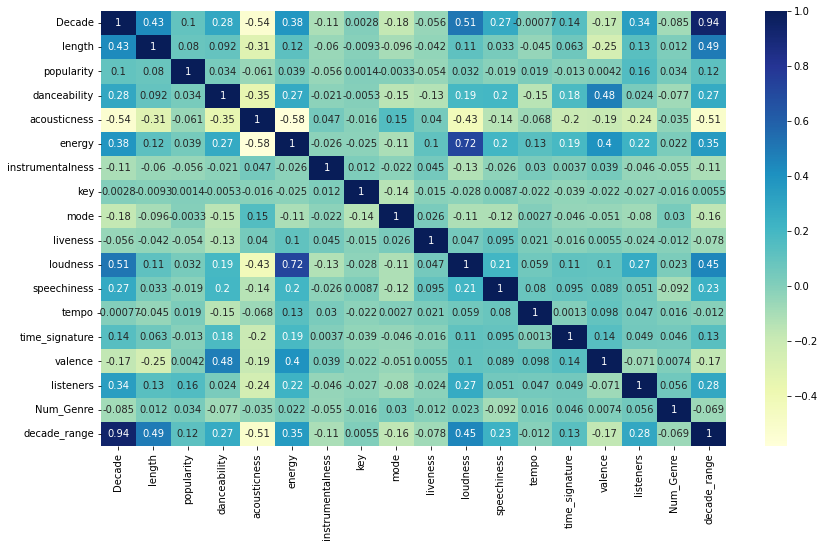

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(data_metrics.corr(),annot=True,cmap="YlGnBu")
plt.show()

<a id="3.2"></a>
### 3.2 Plotting and Visualizations

<a id="3.2.1"></a>
#### 3.2.1 Variable Distributions

Let's analyze the distribution of all variables.  
Seaborn histplot gives a more detailed view of the variables distribution. Variables like length, acousticness, liveness, listeners and speechiness have a negatively skewed distribution. Meanwhile, features loudness and valence, danceability and energy have a positively skewed distribution. Variables like instrumentalness seem to have a lot of values between the 0 and 0,1 range. Other features like key, mode and time signature are categorical variables. Most of the songs seem to have a 4/4 time, are in C Major key, and have major chords.

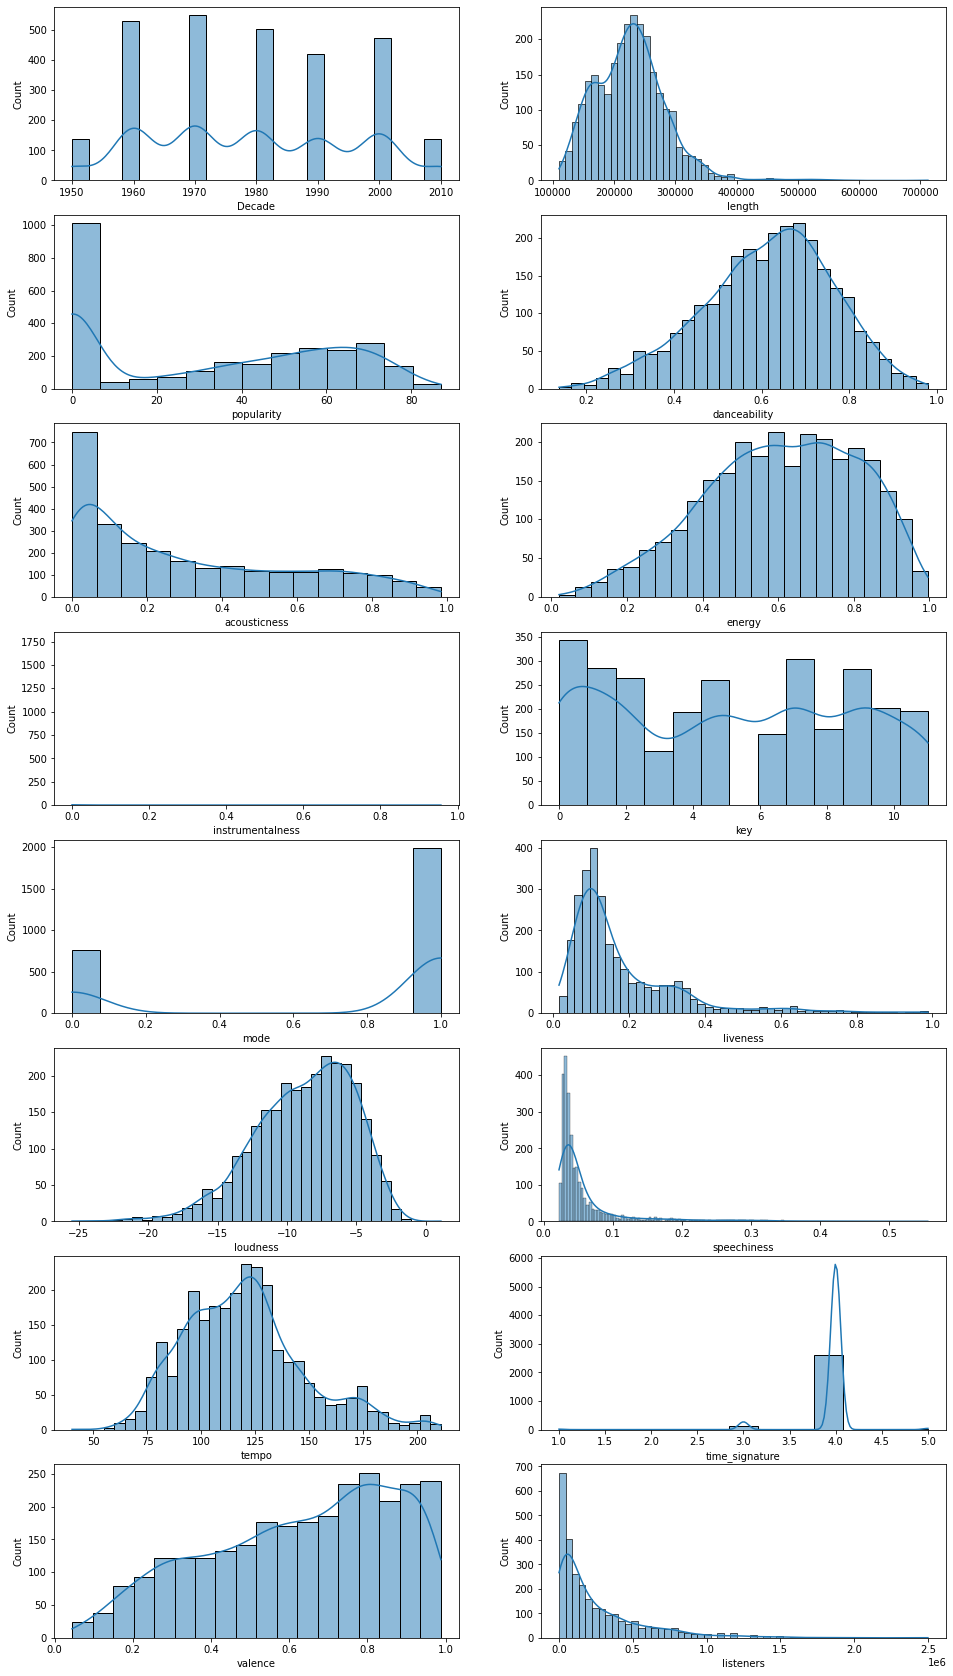

In [52]:
# create numerical variables dataframe
data_num = data_metrics.select_dtypes(include = ['float64', 'int64','int32'])
#exclude decade column for a better visualization
feat = data_num.columns
# plot
fig = plt.subplots(figsize=(16,30))
for x,i in zip(feat,range(1, 17)):
    plt.subplot(8, 2, i)
    sns.histplot(data= data_num, x=x,kde=True)
    plt.xlabel(x)

<a id="3.2.2"></a>
#### 3.2.2 Relationship Between Input Variables and Output Variable 

The following plot was created using the seaborn lineplot shows that several variables have a linear relationship with the output variable. Comparing the correlations heatmap with the lineplot below, variables that have a major correlation to the output present a linear relationship with the decade range variable. Therefore, they will have a major impact on the prediction process.

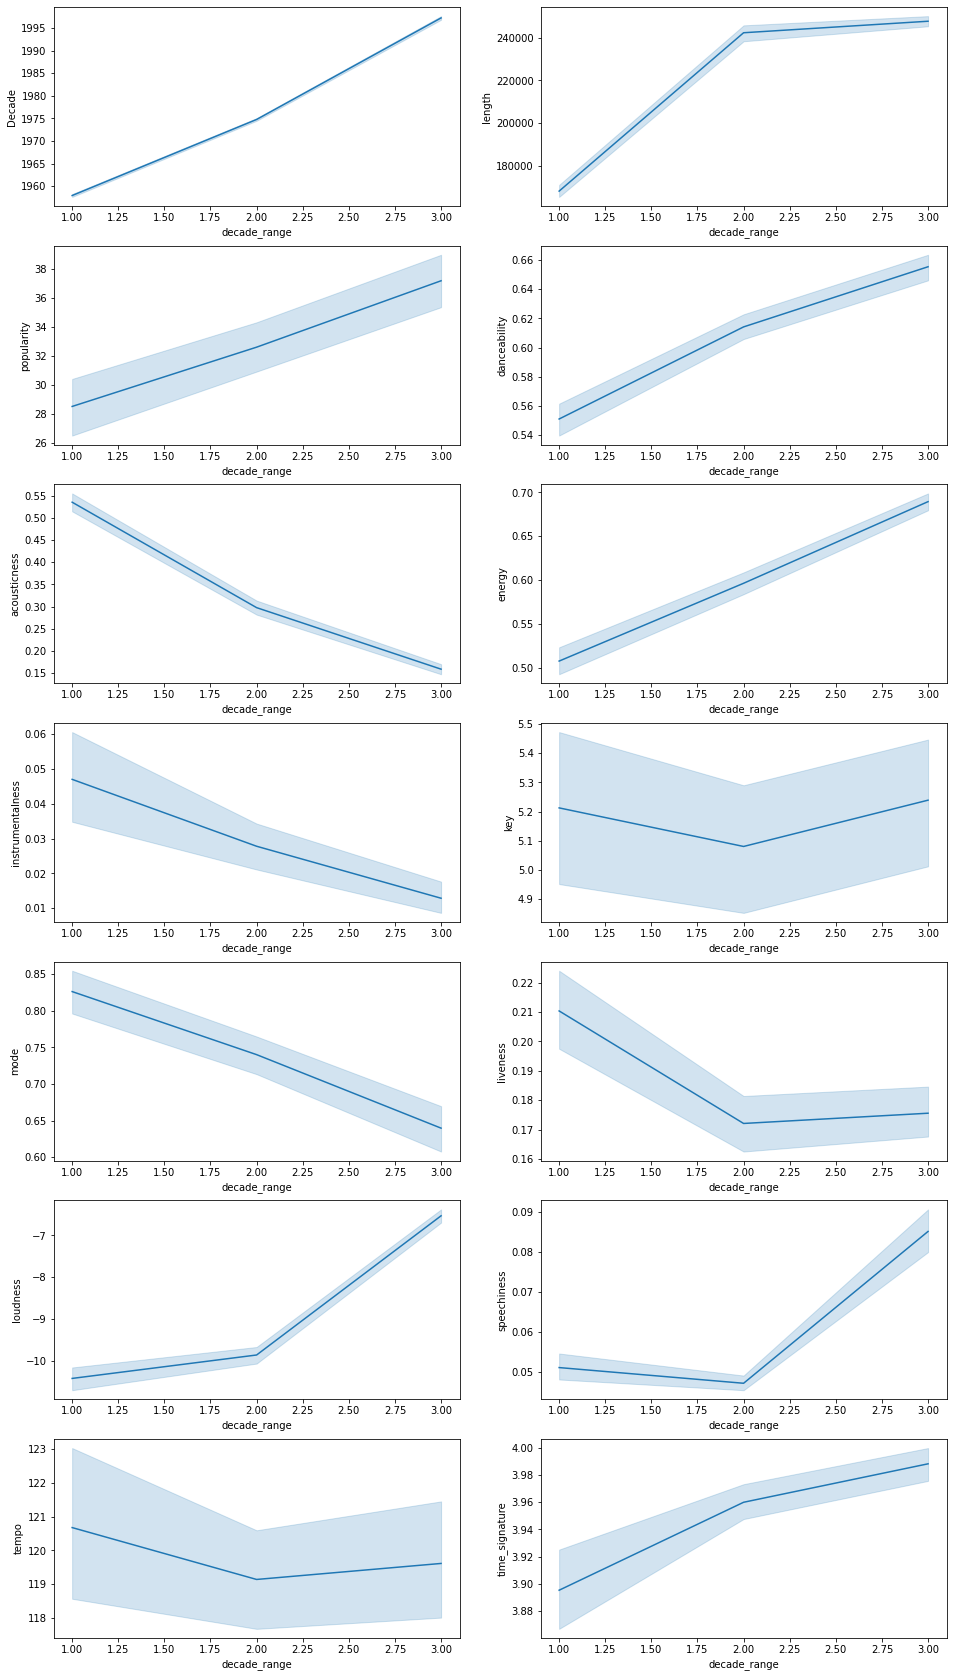

In [53]:
# plot
fig = plt.subplots(figsize=(16,30))
for x,i in zip(feat,range(1, 15)):
    plt.subplot(7, 2, i)
    sns.lineplot(x='decade_range', y=x, data=data_num)

<a id="3.2.3"></a>
#### 3.2.3 Detect Outliers

Another interesting point that needs to be discussed is the presence of outliers. To have a more clear visualisation, I am going to plot the variables using seaborn's boxplot. Since some of the features have different values and cannot be visually represented in the same plot, they are going to be rescaled.

I am going to start first by copying a new dataframe and rescale some of the variables.

In [54]:
rescaled_data=data_metrics.copy()
def rescale_zero_to_one(x,lo,hi):
    return (x-lo)/(hi-lo)
for x in ['Decade','length','popularity','key','loudness','tempo','time_signature','listeners','Num_Genre']:
    lo=rescaled_data[x].min()
    hi=rescaled_data[x].max()
    rescaled_data[x]=rescaled_data[x].apply(rescale_zero_to_one,args=(lo,hi))

Now let's have a more clear visualisation of the outliers.

<AxesSubplot:>

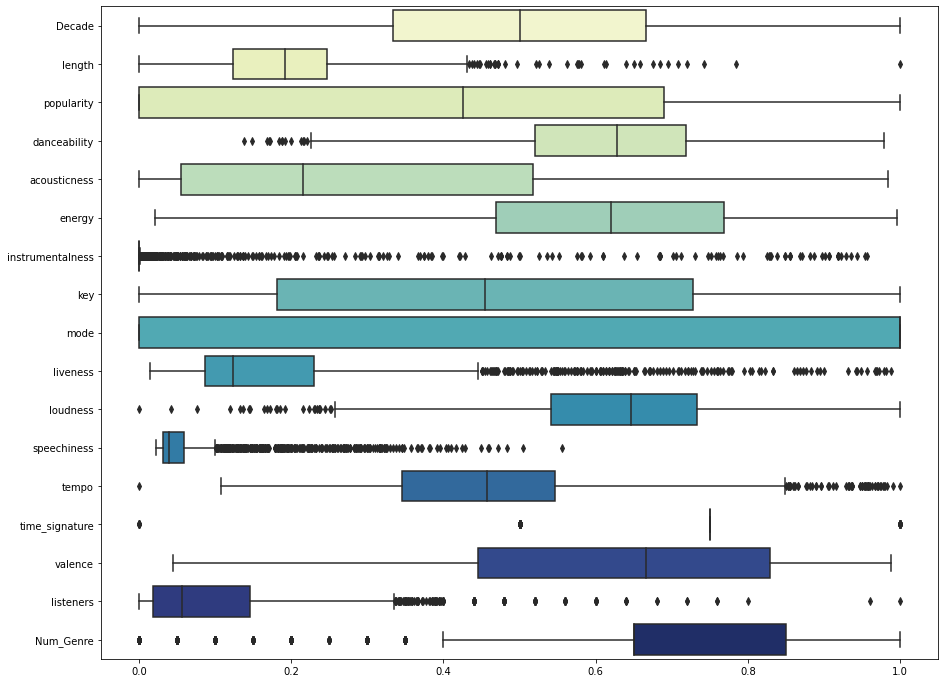

In [55]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(data=rescaled_data.iloc[:,:-1], orient="h",palette="YlGnBu")

As it can be seen from the plot, some of the variables have a presence of outliers (data points located outside the whiskers of the box plot).
These variables are: length, danceability, instrumentalness, liveness, loudness, speechiness, tempo, listeners, and genres. Despite their importance, researchers do not have clear guidelines about how to deal with outliers properly. There are multiple and sometimes conflicting techniques to handle them.[5]  
Kwis et.al state that there are three methods for treating outliers.[6] The first one is to remove them as a means of trimming the data set. The second method involves replacing the values of outliers through outlier weight adjustments. The last method estimates the values of outliers using robust techniques. In the following rows I am going to analyse the first two methods.

The first method of removing outliers, if applied to all columns, tends to remove quite a lot of data (more than 1100 songs) which might result in a big loss of information. The following code creates a function that removes values that are outside the lower or higher fences.

In [56]:
remove_outliers_data=rescaled_data.copy()
def remove_outlier(df, variable):   
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-1.5*iqr
    higher_fence = q3+1.5*iqr
    df = df.loc[(df[variable] > lower_fence) & (df[variable] < higher_fence)]
    return df

for x in ['length','danceability','instrumentalness','liveness','loudness','speechiness','tempo','listeners'] :
    remove_outliers_data=remove_outlier(remove_outliers_data,x)

len(remove_outliers_data)

1594

As we can see in the following chart the function removed the original outliers, removing a lot of information from the dataframe.

<AxesSubplot:>

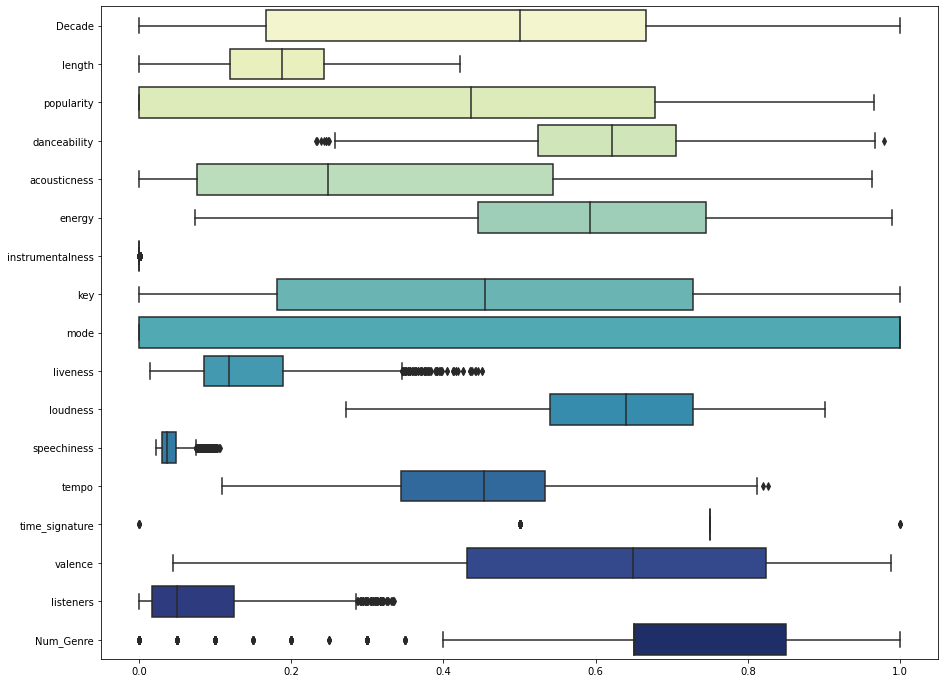

In [57]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(data=remove_outliers_data.iloc[:,:-1], orient="h",palette="YlGnBu")

The second method called winsorizing consists in assigning the value of the k-th percentile to any value above or below the percentile k on each side of the variables' distribution. In this case all observations above the 95th percentile will take the value of the 95th percentile, meanwhile values below the 5th percent will take its value.

In [58]:
winsorized_data = rescaled_data.copy()
for x in ['length','danceability','instrumentalness','liveness','loudness','speechiness','tempo','listeners']:
    winsorized_data[x] = winsorize(winsorized_data[x], limits=(0.05, 0.05))

Winsorizing removes the outliers without removing the song by the dataframe.

<AxesSubplot:>

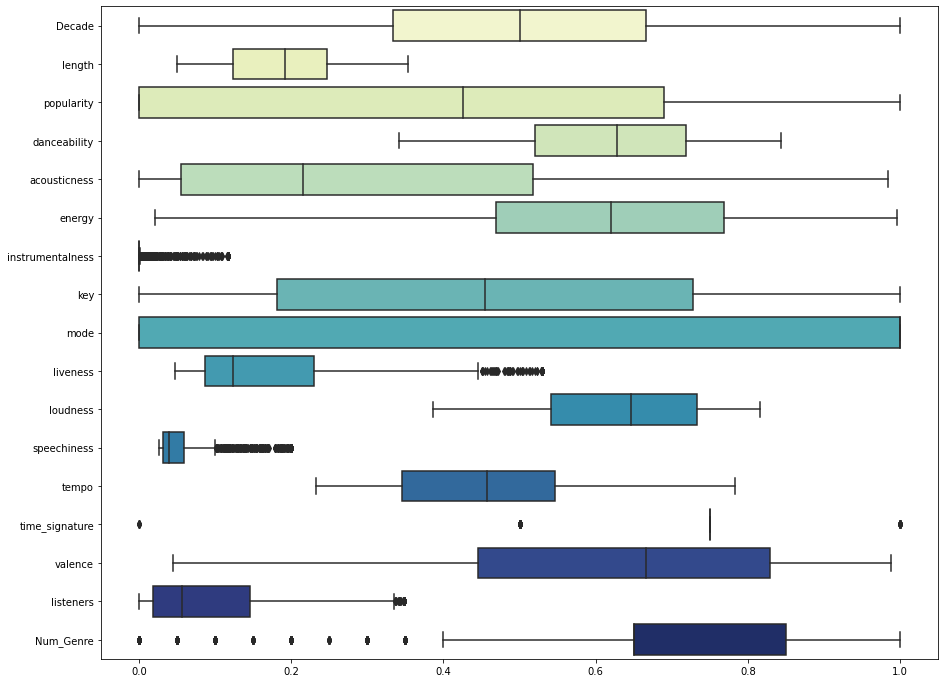

In [59]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(data=winsorized_data.iloc[:,:-1], orient="h",palette="YlGnBu")

<a id="4"></a>
## 4. Machine Learning Models

In this paper two machine learning models are going to be used. The first model is going to be the Logistic Regression model, meanwhile the second will be the Convolutional Neural Network model . Since the aim of this paper is not to provide an in depth explanation of the ML models used they not going to be highly developed and elaborated.

<a id="4.1"></a>
### 4.1 Train Test Splitting and Data Preprocessing

First, let's create new copies of the dataframe, one for the unprocessed and one for the processed data. The data sets are the same except for the fact that one of them has gone through some preprocessing techniques. In this case I have considered preprocessing techiniques rescaling and winsorizing.

In [60]:
data_ml=data.drop(['Genre','song','Decade'],axis=1)
processed_data_ml=winsorized_data.drop(['Genre','song','Decade'],axis=1)

The prediction process will start by creating two variables: X for input features and y for output feature. After that, these features will be split into train and test variables using train_test_split function from the sklearn library.

In [61]:
#train test splitting
X = data_ml.drop(['decade_range'], axis=1)
y = data_ml['decade_range']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_p = processed_data_ml.drop(['decade_range'], axis=1)
y_p = processed_data_ml['decade_range']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p,y_p, test_size = 0.2, random_state = 42)

<a id="4.2"></a>
### 4.2 Multinomial Logistic Regression

<br>The first classification algorithm used is the Multinomial Logistic Regression Model. It can be considered as a modified version of the binary Logistic Regresion, that predicts the multinomial probabilities for each input value.</br>
<br> For the algorithm deployment and the metrics, the scikit-learn library is going to be used.</br>

In [62]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

Fit and predict for the unprocessed data.

In [63]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.55      0.62       141
           2       0.45      0.57      0.51       212
           3       0.53      0.47      0.50       198

    accuracy                           0.53       551
   macro avg       0.57      0.53      0.54       551
weighted avg       0.55      0.53      0.53       551



Fit and predict for the processed data.

As we can see rescaling and winsorizing the data has a remarkable effect on the logistic regression model accuracy.

In [64]:
logreg.fit(X_train_p,y_train_p)
y_pred_p=logreg.predict(X_test_p)
print(metrics.classification_report(y_test_p,y_pred_p))

              precision    recall  f1-score   support

           1       0.80      0.79      0.80       141
           2       0.68      0.66      0.67       212
           3       0.75      0.79      0.77       198

    accuracy                           0.74       551
   macro avg       0.75      0.75      0.75       551
weighted avg       0.74      0.74      0.74       551



To have a better representation of our model results, let's see the confusion matrix, which provides a comparison of the true values and the predicted ones the model generated. Seems like the model is able to distinguish songs from the 50s-60s with songs from the 90s-10s. However, it sometimes classifies songs that are part of these groups as 70s-80s songs and vice versa.

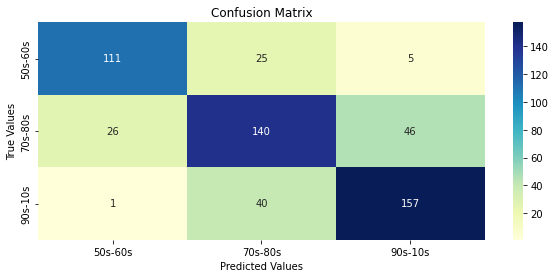

In [65]:
# confusion matrix plot for the preprocessed data
cm = confusion_matrix(y_test_p, y_pred_p)
cm_df = pd.DataFrame(cm,
                     index = ['50s-60s','70s-80s','90s-10s'], 
                     columns = ['50s-60s','70s-80s','90s-10s'])
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_df, annot=True,fmt='g',cmap="YlGnBu") #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

<a id="4.3"></a>
### 4.3 Convolutional Neural Network

The convolutional network is compiled following the instructions from the paper Music Genre Classification by Huang et.al. The model in my project is constructed using 5 convolution layers, each with its regularization, and cross entropy loss. It will be implemented with TensorFlow and Keras.

Fit and predict for the unprocessed data.

In [66]:
# define the keras model
model = Sequential()
model.add(Dense(512,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(4,activation='softmax',kernel_regularizer=regularizers.l2(0.0001)))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
# fit the keras model on the dataset
model.fit(X_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
221/221 [==============================] - 1s 2ms/step - loss: 1136.7202 - accuracy: 0.3835
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 157.5690 - accuracy: 0.3848
Epoch 3/100
221/221 [==============================] - 0s 2ms/step - loss: 83.9148 - accuracy: 0.3862
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 44.5078 - accuracy: 0.3766
Epoch 5/100
221/221 [==============================] - 0s 2ms/step - loss: 24.6343 - accuracy: 0.3907
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 20.7937 - accuracy: 0.3816
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 16.5114 - accuracy: 0.3730
Epoch 8/100
221/221 [==============================] - 0s 2ms/step - loss: 12.4953 - accuracy: 0.3835
Epoch 9/100
221/221 [==============================] - 0s 2ms/step - loss: 4.4680 - accuracy: 0.3839
Epoch 10/100
221/221 [==============================] - 0s 2ms/step - loss: 4.14

Now let's evaluate the neural network model.

In [67]:
# evaluate the keras model
test_loss,test_acc = model.evaluate(X_test,y_test,batch_size=128)
print("The test Loss is: ",test_loss)
print("The Best test Accuracy is : ",test_acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3593
The test Loss is:  1.097259283065796
The Best test Accuracy is :  35.93466281890869


Fit and predict for the processed data.

In [68]:
# define the keras model
model = Sequential()
model.add(Dense(512,activation='relu',input_dim=(X_train_p.shape[1]),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(4,activation='softmax',kernel_regularizer=regularizers.l2(0.0001)))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
# fit the keras model on the dataset
model.fit(X_train_p,y_train_p, epochs=100, batch_size=10)

Epoch 1/100
221/221 [==============================] - 1s 2ms/step - loss: 0.8957 - accuracy: 0.5879
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 0.7688 - accuracy: 0.6456
Epoch 3/100
221/221 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.6801
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6988
Epoch 5/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7151
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7129
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7292
Epoch 8/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7401
Epoch 9/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.7206
Epoch 10/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6182 - accura

In [69]:
# evaluate the keras model
test_loss,test_acc = model.evaluate(X_test_p,y_test_p,batch_size=128)
print("The test Loss is: ",test_loss)
print("The Best test Accuracy is : ",test_acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 1.4673 - accuracy: 0.7278
The test Loss is:  1.4672510623931885
The Best test Accuracy is :  72.77677059173584


<a id="5"></a>
## 5. Conclusions

<br>Through this project we have been able to create two machine learning models capable of predicting the period when a song was released. This project proved that sometimes simpler models like Logistic Regression can be more accurate than more complex ones like neural networks. This could be explained with the fact that some input features had a linear relationship with the output variable.  
Furthermore, it proved that preprocessing techniques such as rescaling and winsorizing improved remarkably the predicting capability of our models. The accuracy of the logistic regression went from 53% to 74% and the accuracy of the convolutional neural network from 35% to 72%. </br>
<br>However, even though the models had discrete accuracy, their predicting performance could improve. This improvement may be achieved in different ways. The first one would be gathering more training data for our machine learning models. The second way would be treating outliers for each feature in a different way, setting distinct threshold values for each feature. Another way to improve accuracy would be changing the parameters for each model.</br>

<a id="6"></a>
## 6. References and Resources

<a id="6.1"></a>
### 6.1 References

<ol>
    <li> Project Proposal. 'A Trip Through The Evolution Of Modern Music', (2022) </li>
    <li> Brownlee, J. 'Multinomial Logistic Regression With Python. [online] Machine Learning Mastery' (2022). Available at: <https://machinelearningmastery.com/multinomial-logistic-regression-with-python/> [Accessed 21 February 2022]. </li>
    <li> Albawi, Saad, Tareq Abed Mohammed, and Saad Al-Zawi. 'Understanding of a Convolutional Neural Network', 2017 International Conference on Engineering and Technology (ICET), (2017), pp. 1-6. </li>
    <li> Huang, Derek A.. 'Music Genre Classification', (2018). </li> 
    <li> Aguinis, Herman, Ryan K. Gottfredson, and Harry Joo. 'Best-Practice Recommendations for Defining, Identifying, and Handling Outliers', Organizational Research Methods, vol. 16/no. 2, (2013), pp. 270-301. </li>
    <li> Kwak, Sang Kyu, and Jong Hae Kim. 'Statistical Data Preparation: Management of Missing Values and Outliers', Korean Journal of Anesthesiology, vol. 70/no. 4, (2017), pp. 407-411. </li>
</ol>

<a id="6.2"></a>
### 6.2 Resources

<ul>
    
General:
    <li>https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe</li>
    <li>https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/</li>
    <li>https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0</li>
    <li>https://www.dataquest.io/blog/last-fm-api-python/</li>
    <li>https://stackoverflow.com/questions/64815194/spotify-python-api-call-timeout-issues</li>
    <li>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html</li>
    <li>https://stackoverflow.com/questions/3069382/what-is-the-difference-between-connection-and-read-timeout-for-sockets</li>
    
Machine Learning:
    <li>https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/</li>
    <li>https://machinelearningmastery.com/multinomial-logistic-regression-with-python/</li>

Plotting:
    <li>https://seaborn.pydata.org/generated/seaborn.histplot.html</li>
    <li>https://seaborn.pydata.org/generated/seaborn.boxplot.html</li>
    <li>https://seaborn.pydata.org/generated/seaborn.lineplot.html</li>
</ul>

[Return to First Page](#0)